In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Read Data Set

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Shape

In [4]:
print(df.shape)
print(df.shape[0])

(768, 9)
768


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.select_dtypes(exclude = 'object').columns
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


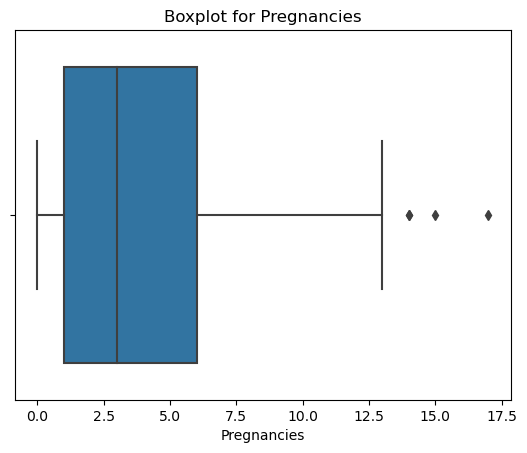

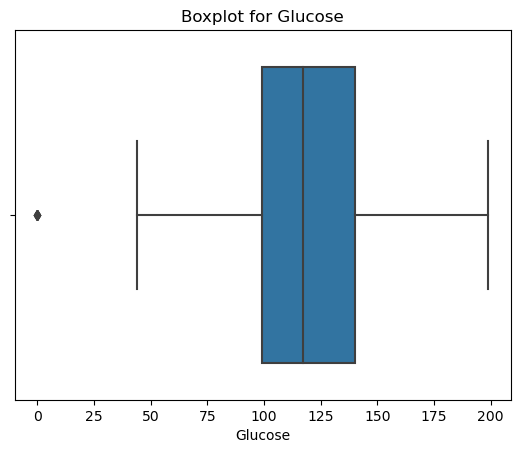

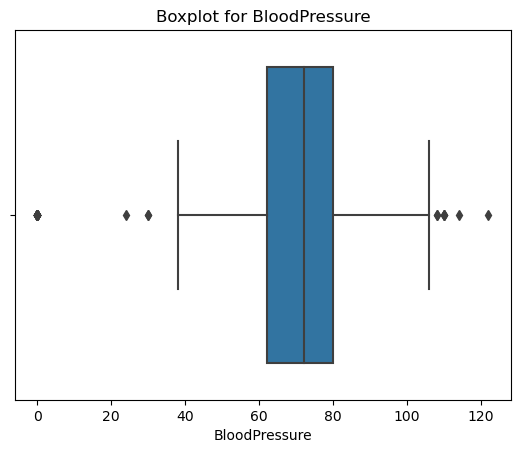

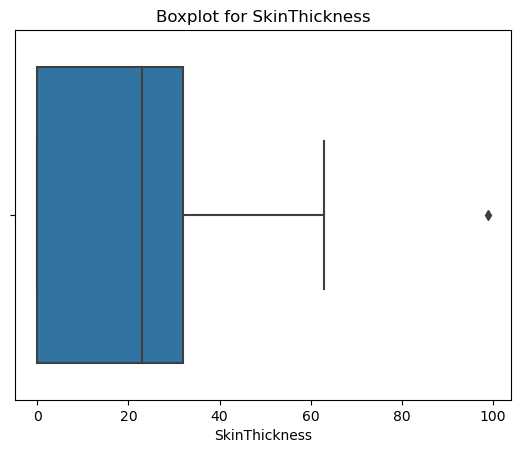

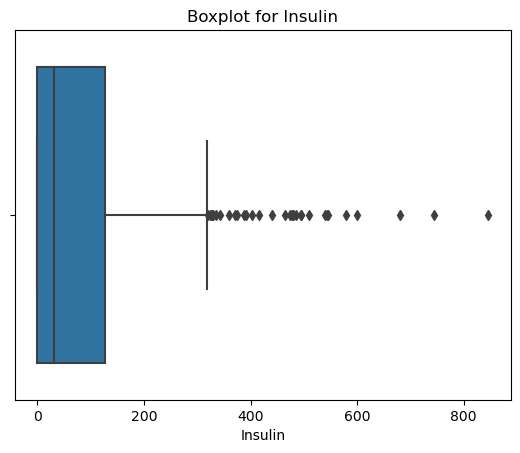

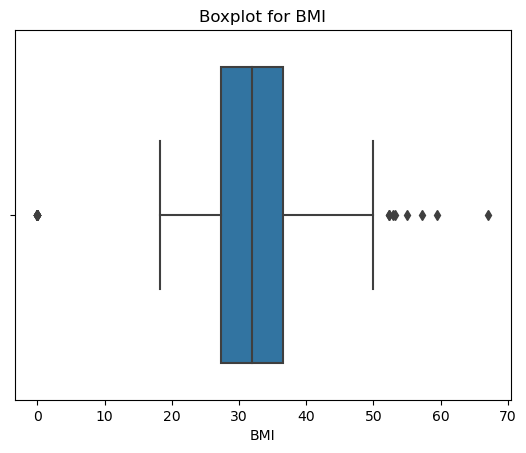

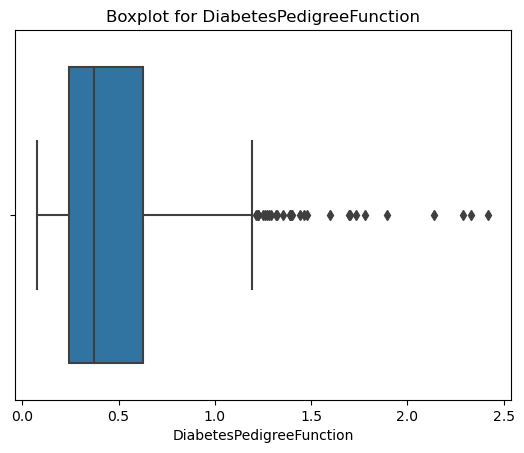

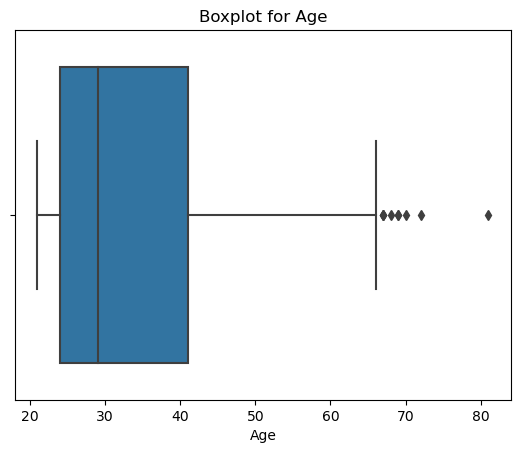

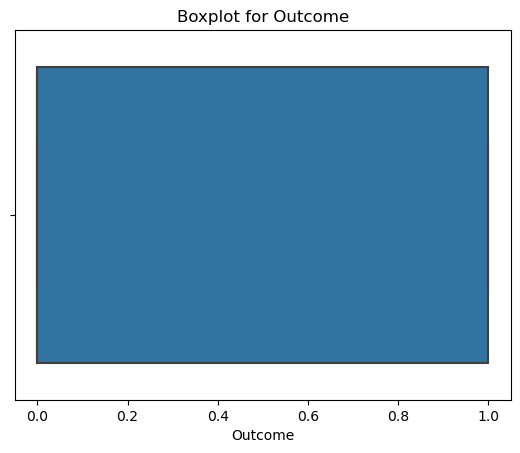

In [45]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
print(num_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


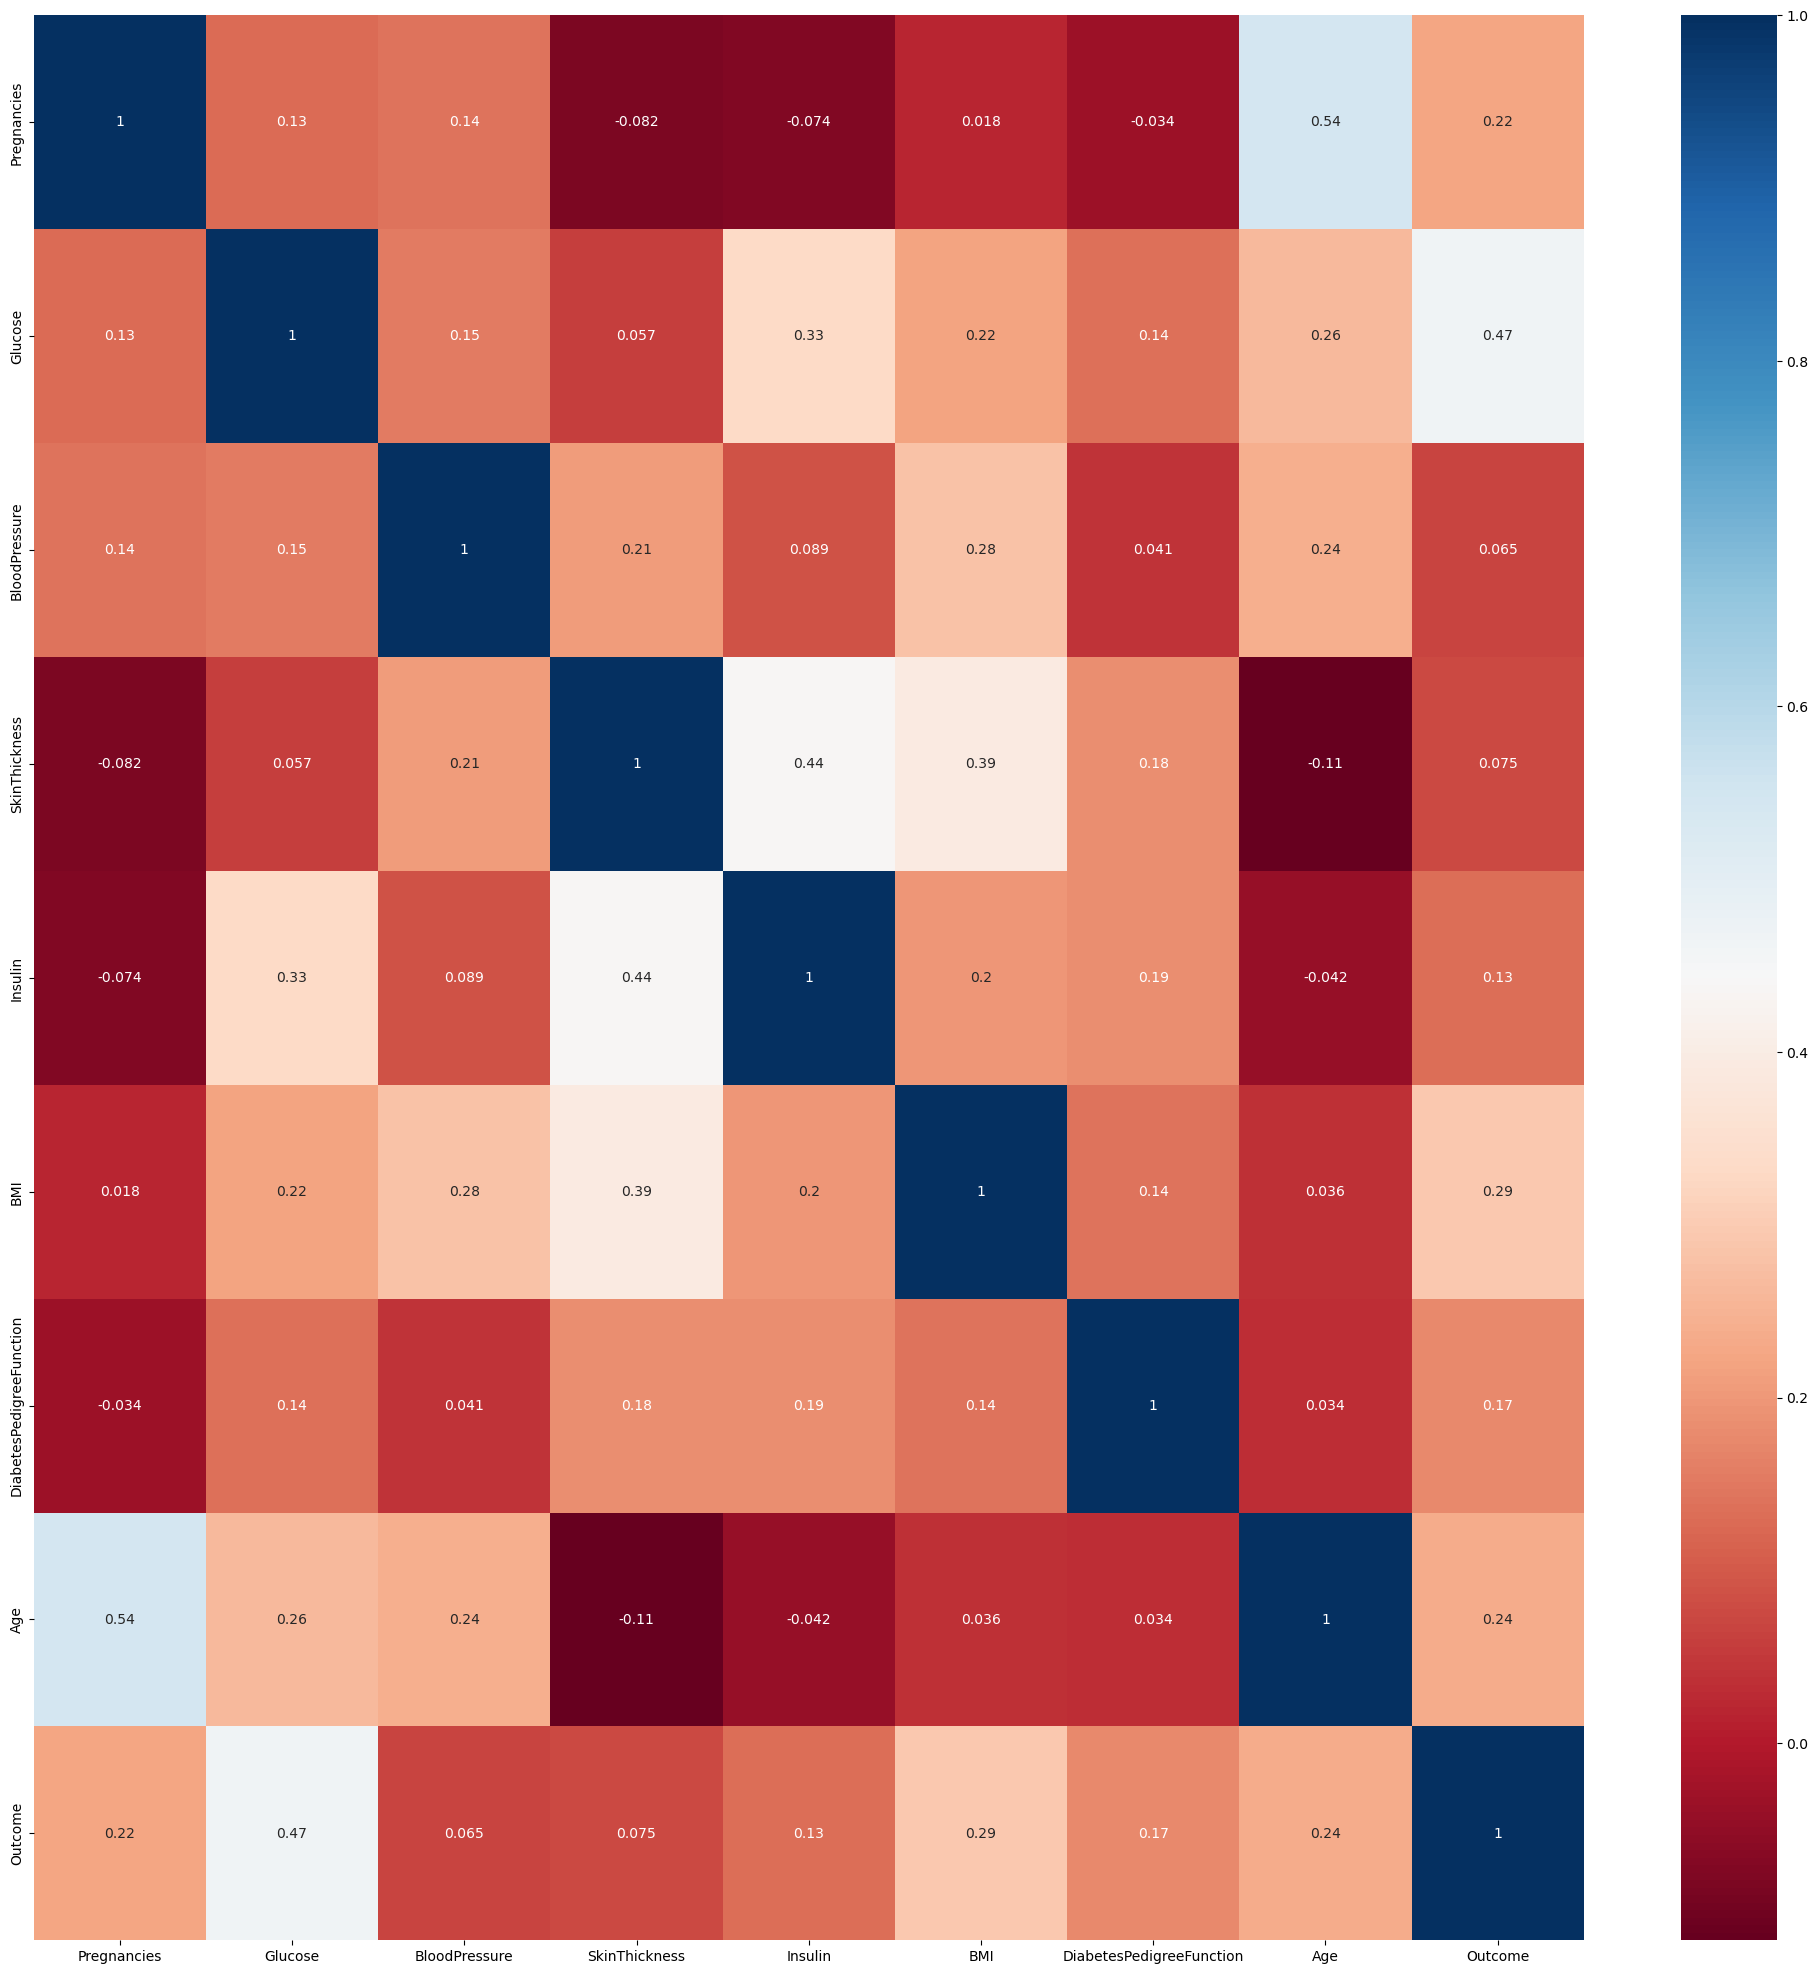

In [19]:
corr = df.corr()  
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu') 
plt.show()

##### Outliers Treatment

In [20]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


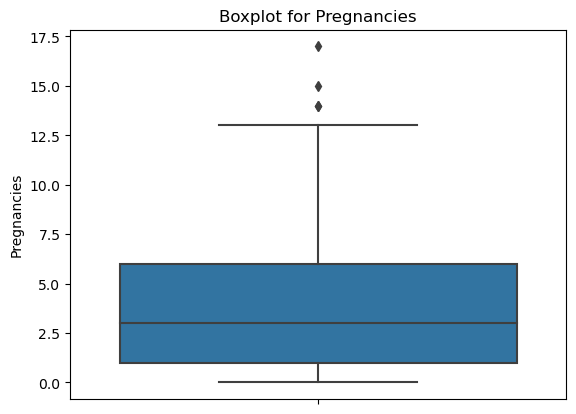

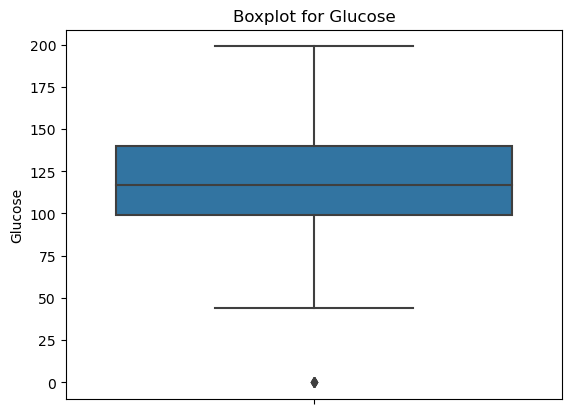

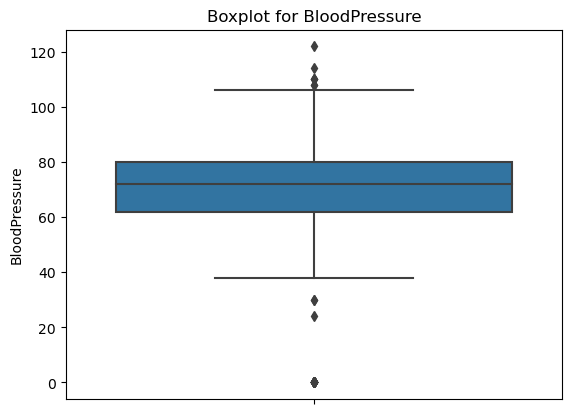

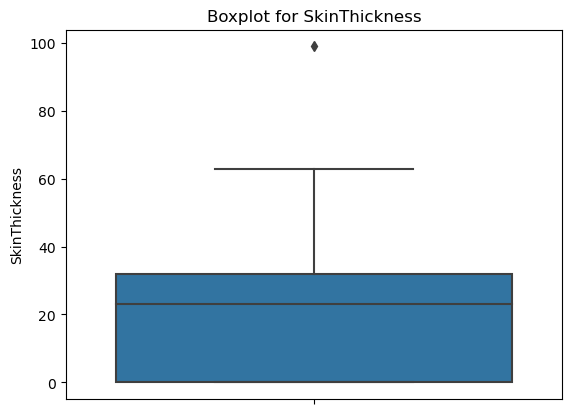

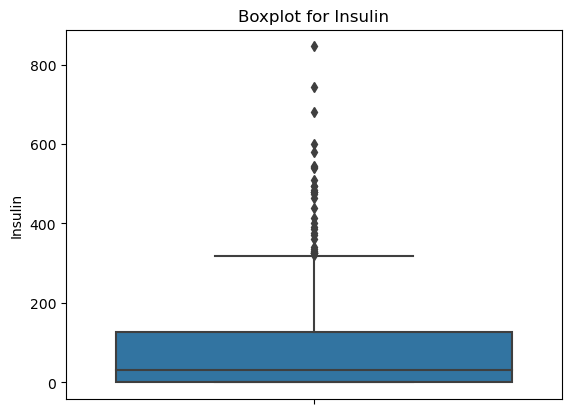

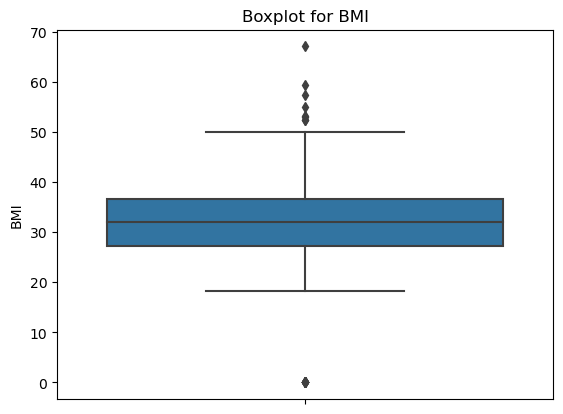

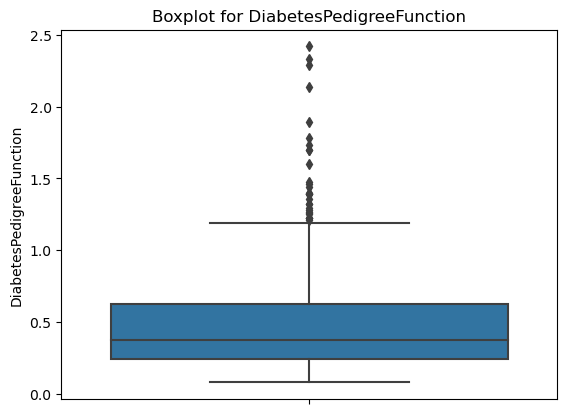

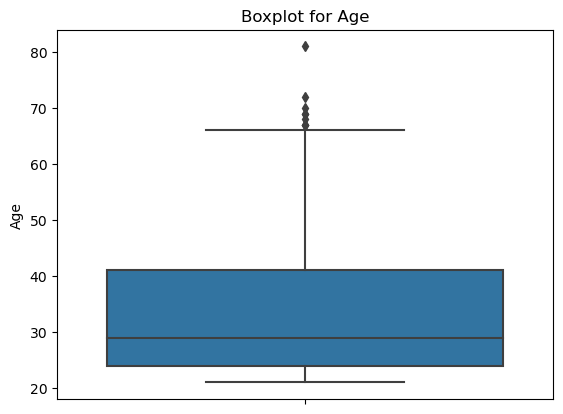

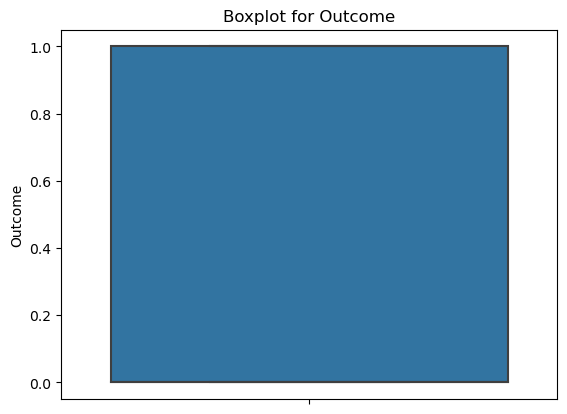

In [21]:
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [25]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.00000,3.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,79.00000,117.0000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,38.70000,72.0000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.00000,23.0000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.00000,30.5000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.80000,32.0000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.14035,0.3725,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.00000,29.0000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.00000,0.0000,1.00


In [23]:
df.describe(percentiles=[0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,3.0000,9.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,117.0000,167.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,72.0000,88.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,23.0000,40.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,30.5000,210.0000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,32.0000,41.5000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.3725,0.8786,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,29.0000,51.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.0000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [ ]:
print(df[df['Glucose']<69].shape)
print(df[df['insuline']])


In [29]:
x = df.drop('Outcome',axis=1)  # x = independent features
y = df['Outcome']              # y = dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [32]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))

In [33]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [34]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [35]:
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))

Train Score 0.7839851024208566
Test Score 0.7359307359307359


In [36]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
ypred = lr.predict(x_test)
eval_model(y_test,ypred)

# [TP FN]
# [FP TN]

# [TN FP]
# [FN TP]

[[120  31]
 [ 30  50]]
Accuracy Score 0.7359307359307359
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [38]:
ypred_lr_proba = lr.predict_proba(x_test)
print(len(ypred_lr_proba))
print(ypred_lr_proba[:10])

231
[[0.73341854 0.26658146]
 [0.80984974 0.19015026]
 [0.8763995  0.1236005 ]
 [0.85434044 0.14565956]
 [0.49541534 0.50458466]
 [0.54665411 0.45334589]
 [0.98671945 0.01328055]
 [0.40390944 0.59609056]
 [0.43676123 0.56323877]
 [0.20008716 0.79991284]]


In [40]:
print(sum(ypred_lr_proba[100]))
print(sum(ypred_lr_proba[0]))

1.0
1.0


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc_auc_score returns AUC

In [42]:
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('AUC',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

AUC 0.796523178807947


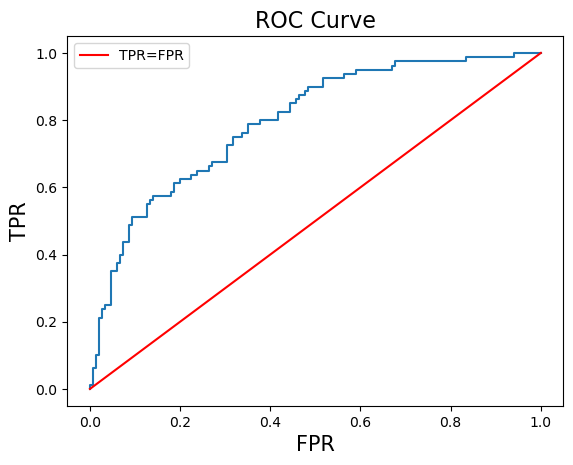

In [43]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_lr_proba)

In [44]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

47
0.3084636126126668


In [46]:
np.armax(tpr*(1-fpr))
print(idx)
print(thresh[62])

AttributeError: module 'numpy' has no attribute 'armax'